<div align='center'>
    <a href="https://ibb.co/wcN1JMS"><img src="https://i.ibb.co/KKjHNF2/Coffee-FTX-BLOG0323-5262d6f9296f413fa645a1686999f43d.jpg" alt="Coffee-FTX-BLOG0323-5262d6f9296f413fa645a1686999f43d" border="0"></a>
</div>

# Project Content

* 1. [Introduction](#1)
        * 1.1 [About Dataset](#1.1)
* 2. [Getting to Know the Dataset](#2)
        * 2.1 [Load Libraries](#2.1)
        * 2.2 [Load Dataset](#2.2)
        * 2.3 [Getting to Know The Variables](#2.3)
        * 2.4 [Exploring the Dataset](#2.4)
            * 2.4.1 [Analysis Output](#2.4.1)
        * 2.5 [Checking Missing Values](#2.5)
            * 2.5.1 [Analysis Output](#2.5.1)
        * 2.6 [Checking Unique Values Of Categorical Features](#2.6)
            * 2.6.1 [Analysis Output](#2.6.1)
* 3. [Feature Engineering](#3)
        * 3.1 [Correting Dtype of Datatime](#3.1)
        * 3.2 [Extract Detailed Information From Date](#3.2)
        * 3.3 [Add Total Sales](#3.3)
* 4. [Exploratory Data Analysis](#4)
        * 4.1 [Analyzing The DataFrame Using Barplot](#4.1)
            * 4.1.1 [Count of Products Per Category](#4.1.1)
            * 4.1.2 [Top Selling Products](#4.1.2)
            * 4.1.3 [Top Selling Category](#4.1.3)
            * 4.1.4 [Most Expensive Products](#4.1.4)
            * 4.1.5 [Total Sales Per Store](#4.1.5)
            * 4.1.6 [Total Sales Per Day](#4.1.6)
            * 4.1.7 [Total Sales Per Category](#4.1.7)
            * 4.1.8 [Total Sales by store_location & product_category](#4.1.8)
            * 4.1.9 [Total Sales Per store_location & month](#4.1.9)
            * 4.1.10 [Most Ordered Category](#4.1.10)
        * 4.2 [Analyzing The DataFrame Using Pie Chart](#4.2)
            * 4.2.1 [Pie Chart Of Transaction's Count Per Store](#4.2.1)
            * 4.2.2 [Distribution of Sales by Product Category](#4.2.2)
            * 4.2.3 [Distribution of Sales by Transaction Month](#4.2.3)
            * 4.2.4 [Pie Chart of Top Selling Products](#4.2.4)
        * 4.3 [Sales Per Month Based on Total Revenue](#4.3)
        * 4.4 [Generate WordCloud From product_details](#4.4)
        * 4.5 [unit_price Distribution](#4.5)
            * 4.5.1 [Analysis Output](#4.5.1)
        * 4.6 [total_sales Distribution](#4.6)
            * 4.6.1 [Analysis Ouput](#4.6.1)
        * 4.7 [Box Plot for unit_price & total_sales](#4.7)
            * 4.7.1 [Analysis Output](#4.7.1)
        * 4.8 [Unit Price vs. Total Sales](#4.8)
            * 4.8.1 [Analysis Output](#4.8.1)
 5,. S[imple ML Modelling Using LinearR Regression](#5)

# 1. Introduction <a id=1></a>

## 1.1 About Dataset <a id=1.1></a>

This dataset is ideal for exploring the evolving sales trends over time, identifying peak customer traffic days, and delving into the performance metrics of various products. The dataset comprises transactional records from Maven Roasters, a fictional NYC-based coffee shop operating across three distinct locations. It encompasses comprehensive details such as transaction dates, timestamps, geographical specifics, and product-level information. Researchers can analyze the frequency of product sales, pinpoint top revenue drivers, and investigate factors contributing to fluctuations in sales volume.

You can access the dataset on [kaggle](https://www.kaggle.com/datasets/agungpambudi/trends-product-coffee-shop-sales-revenue-dataset)

# 2. Getting to Know The Dataset <a id=2></a>

## 2.1 Load Libraries <a id=2.1></a>

In [7]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2.2 Load Dataset <a id=2.2></a>

In [8]:
# Load Dataset
# Dataset Source: https://www.kaggle.com/datasets/agungpambudi/trends-product-coffee-shop-sales-revenue-dataset/data
df = pd.read_csv("coffee-shop-sales-revenue.csv", delimiter='|')

## 2.3 Getting to Know the Variables <a id=2.3></a>

| Field            | Type    | Description                                              |
|------------------|---------|----------------------------------------------------------|
| transaction_id   | Numeric | Unique identifier for each transaction.                  |
| transaction_date | Date    | Date when the transaction occurred (YYYY-MM-DD format). |
| transaction_time | Time    | Time of the transaction (HH:MM:SS format).              |
| transaction_qty  | Numeric | Quantity of products purchased in a transaction.         |
| store_id         | Numeric | Unique identifier for each store location.               |
| store_location   | Text    | Name or description of the store's physical location.    |
| product_id       | Numeric | Unique identifier for each product sold.                 |
| unit_price       | Numeric | Price of a single unit of the product in the transaction.|
| product_category | Text    | General category to which the product belongs.           |
| product_type     | Text    | Specific type or variant of the product.                 |
| product_detail   | Text    | Additional details about the product.                    |


## 2.4 Exploring The Dataset <a id=2.4><a/>

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [10]:
df.shape

(149116, 11)

In [11]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [9]:
# Check Duplicates
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


### 2.4.1 Analysis Output <a id=2.4.1></a>


1. **Dataset Overview**:
   - The dataset contains 149,116 entries and 11 columns.
   - The columns consist of various types of data, including integers, floats, and objects (likely strings).
   - There are no missing values in any of the columns.

2. **Key Features**:
   - **Transaction ID**: Unique identifier for each transaction.
   - **Transaction Date and Time**: Records the date and time of each transaction.
   - **Transaction Quantity**: Indicates the quantity of products purchased in each transaction.
   - **Store ID and Location**: Provides information about the store where the transaction occurred.
   - **Product ID, Category, Type, and Detail**: Describes the product sold, including its category, type, and additional details.

3. **Observations**:
   - The dataset captures detailed transactional information, including what products were sold, in what quantity, and at what price.
   - With transaction date and time information, temporal trends and patterns can be analyzed, such as peak shopping hours or seasonal variations.
   - Store location data allows for regional analysis and comparisons between different store branches.
   - Product details provide insight into the variety of items sold, allowing for analysis of popular categories or specific product types.

4. **Potential Analysis**:
   - **Sales Trends**: Analyze sales trends over time to identify patterns or seasonality.
   - **Customer Behavior**: Explore purchasing patterns to understand customer preferences and behaviors.
   - **Product Performance**: Evaluate the performance of different product categories/types to optimize inventory and marketing strategies.
   - **Store Comparison**: Compare performance metrics between different store locations to identify high-performing stores or areas for improvement.
   - **Price Analysis**: Assess the impact of unit price variations on transaction quantity and revenue.

5. **Further Exploration**:
   - Data visualization techniques can be applied to better understand trends and relatance decision-making processes.

## 2.5 Checking Missing Values <a id=2.5></a>

In [13]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


### 2.5.1 Analysis Output <a id=2.5.1></a>

* According to previous tables, there are no missing values across any of the columns. This is indicated by the "Non-Null Count" column in the DataFrame summary, which shows that all columns have 149,116 non-null entries. ues.

## 2.6 Checking Unique Values <a id=2.6><a/>

In [18]:
pd.DataFrame(df.nunique(), columns=['Unique Values Count'])

,Unique Values Count
transaction_id,149116
transaction_date,181
transaction_time,25762
transaction_qty,6
store_id,3
store_location,3
product_id,80
unit_price,41
product_category,9
product_type,29


In [23]:
# Seperating Categorical Features
categorical_variables = ['transaction_qty', 'store_id', 'store_location', 'product_category', 'product_type', 'product_detail']

In [24]:
def uniques(col):
    return pd.DataFrame(df[col].unique(), columns=['Unique Values'])

In [25]:
uniques('transaction_qty')

,Unique Values
0,2
1,1
2,3
3,4
4,8
5,6


In [26]:
uniques('store_id')

,Unique Values
0,5
1,8
2,3


In [27]:
uniques('store_location')

,Unique Values
0,Lower Manhattan
1,Hell's Kitchen
2,Astoria


In [28]:
uniques('product_category')

,Unique Values
0,Coffee
1,Tea
2,Drinking Chocolate
3,Bakery
4,Flavours
5,Loose Tea
6,Coffee beans
7,Packaged Chocolate
8,Branded


In [29]:
uniques('product_type')

,Unique Values
0,Gourmet brewed coffee
1,Brewed Chai tea
2,Hot chocolate
3,Drip coffee
4,Scone
5,Barista Espresso
6,Brewed Black tea
7,Brewed Green tea
8,Brewed herbal tea
9,Biscotti


In [30]:
uniques('product_detail')

,Unique Values
0,Ethiopia Rg
1,Spicy Eye Opener Chai Lg
2,Dark chocolate Lg
3,Our Old Time Diner Blend Sm
4,Oatmeal Scone
...,...
75,Our Old Time Diner Blend
76,I Need My Bean! T-shirt
77,Earl Grey
78,Civet Cat


## 2.7 Statistical Analysis <a id=2.7></a>

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,74737.371872,43153.600016,1.0,37335.75,74727.5,112094.25,149456.0
transaction_qty,149116.0,1.438276,0.542509,1.0,1.00,1.0,2.00,8.0
store_id,149116.0,5.342063,2.074241,3.0,3.00,5.0,8.00,8.0
product_id,149116.0,47.918607,17.930020,1.0,33.00,47.0,60.00,87.0
unit_price,149116.0,3.382219,2.658723,0.8,2.50,3.0,3.75,45.0


### 2.7.1 Analysis Output <a id=2.7.1></a>

1. **Transaction ID**:
   - This features is unique identitfier and we do not include it in our analysis.

2. **Transaction Quantity**:
   - The average transaction quantity is around 1.44, with a standard deviation of approximately 0.54. Quantity varies between 1 and 8, with quartiles at 1, 1, and 2.

3. **Store ID**:
    - This features is unique identitfier and we do not include it in our analysis.

4. **Product ID**:
   - This features is unique identitfier and we do not include it in our analysis.

5. **Unit Price**:
   - The mean unit price is approximately 3.38, with a standard deviation of about 2.66. Unit prices range from 0.8 to 45.0, with quartiles at 2.50, 3.00, and 3.75.

# 3. Feature Engineering <a id=3></a>

## 3.1 Correting Dtype of Datatime <a id=3.1></a>

In [33]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

## 3.2 Extract Detailed Information From Date <a id=3.2></a>

In [34]:
df['transaction_day'] = df['transaction_date'].dt.day # extract day
df['transacation_month'] = df['transaction_date'].dt.month # extract month
df['transacation_year'] = df['transaction_date'].dt.year # extract year
df['transacation_hour'] = df['transaction_time'].dt.hour # Extract hour of transaction

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      149116 non-null  int64         
 1   transaction_date    149116 non-null  datetime64[ns]
 2   transaction_time    149116 non-null  datetime64[ns]
 3   transaction_qty     149116 non-null  int64         
 4   store_id            149116 non-null  int64         
 5   store_location      149116 non-null  object        
 6   product_id          149116 non-null  int64         
 7   unit_price          149116 non-null  float64       
 8   product_category    149116 non-null  object        
 9   product_type        149116 non-null  object        
 10  product_detail      149116 non-null  object        
 11  transaction_day     149116 non-null  int32         
 12  transacation_month  149116 non-null  int32         
 13  transacation_year   149116 no

In [38]:
# # drop "transaction_time"
df.drop(columns=['transaction_time', 'transaction_time'], inplace=True)

In [39]:
df.head(2)

,transaction_id,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_day,transacation_month,transacation_year,transacation_hour,total_sales
0,1,2023-01-01,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,2023,7,6.0
1,2,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7,6.2


## 3.3 Add Total Sales <a id=3.3></a>

In [37]:
df['total_sales'] = df['transaction_qty'] * df['unit_price']
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_day,transacation_month,transacation_year,transacation_hour,total_sales
0,1,2023-01-01,2024-05-10 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,2023,7,6.0
1,2,2023-01-01,2024-05-10 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7,6.2


# 4. Exploratory Data Analysis

In [43]:
# Set font desgin for plots 
title_font = {"color" : "darkblue", "weight" : "bold", "size" : 15}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 10}

## 4.1 Analyzing The DataFrame Using Barplot <a id=4.1></a>

### 4.1.1 Count of Products Per Category <a id=4.1.1></a>

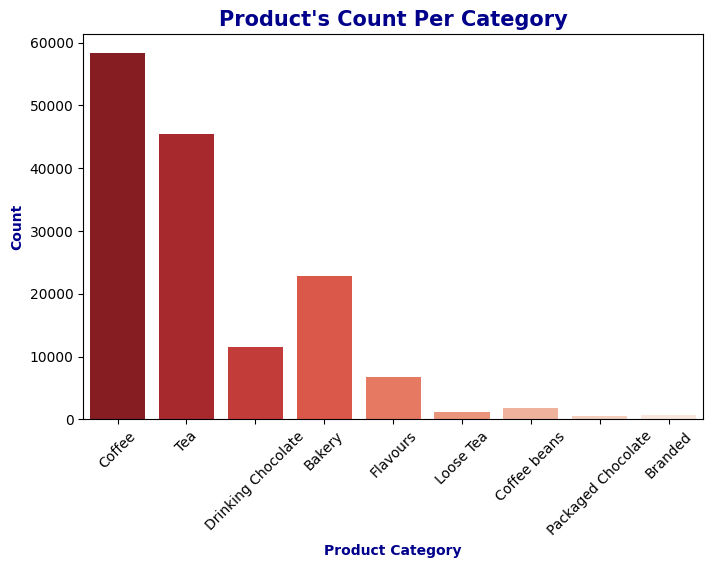

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='product_category', palette='Reds_r')
plt.title("Product's Count Per Category", fontdict=title_font)
plt.xlabel('Product Category', fontdict=axis_font)
plt.ylabel('Count', fontdict=axis_font)
plt.xticks(rotation=45)
plt.show()

### 4.1.2 Top Selling Products <a id=4.1.2></a>

In [46]:
products_top10 = df['product_type'].value_counts().head(10)
products_top10

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64

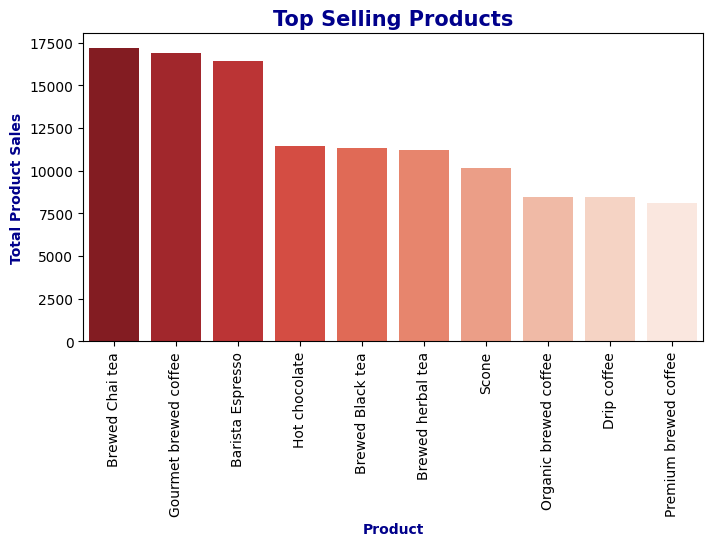

In [48]:
plt.figure(figsize=(8, 4))
sns.barplot(x=products_top10.index, y=products_top10, palette='Reds_r')
plt.title("Top Selling Products", fontdict=title_font)
plt.xlabel("Product", fontdict=axis_font)
plt.ylabel("Total Product Sales", fontdict=axis_font)
plt.xticks(rotation=90)
plt.show()

### 4.1.3 Top Selling Category <a id=4.1.3></a>

In [49]:
category_top5 = df['product_category'].value_counts().sort_values(ascending=False).head(5)
category_top5

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Name: count, dtype: int64

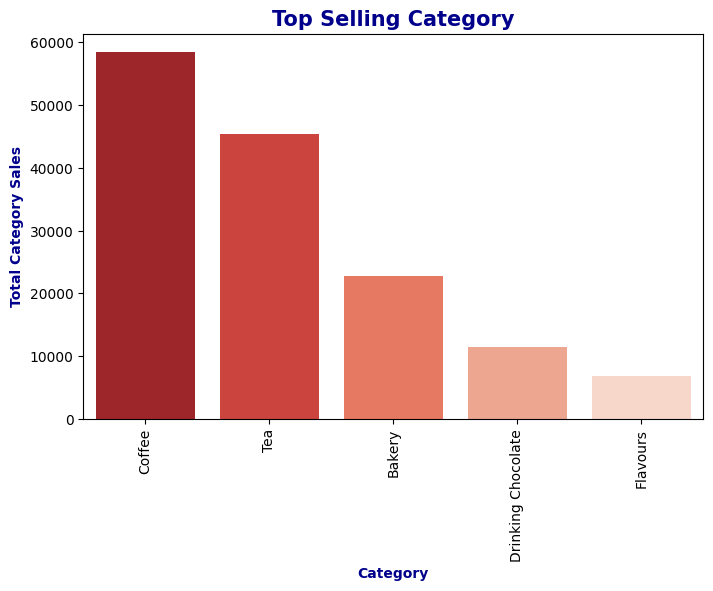

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(x=category_top5.index, y=category_top5, palette='Reds_r')
plt.title("Top Selling Category", fontdict=title_font)
plt.xlabel("Category", fontdict=axis_font)
plt.ylabel("Total Category Sales", fontdict=axis_font)
plt.xticks(rotation=90)
plt.show()

### 4.1.4 Most Expensive Products <a id=4.1.4></a>

In [52]:
top_expensive_products = df.groupby('product_type')['unit_price'].max().sort_values(ascending=False).reset_index().head(10)
top_expensive_products

,product_type,unit_price
0,Premium Beans,45.00
1,Organic Beans,28.00
2,Clothing,28.00
3,Housewares,23.00
4,Gourmet Beans,21.00
5,Espresso Beans,20.45
6,House blend Beans,18.00
7,Drinking Chocolate,13.33
8,Chai tea,10.95
9,Green beans,10.00


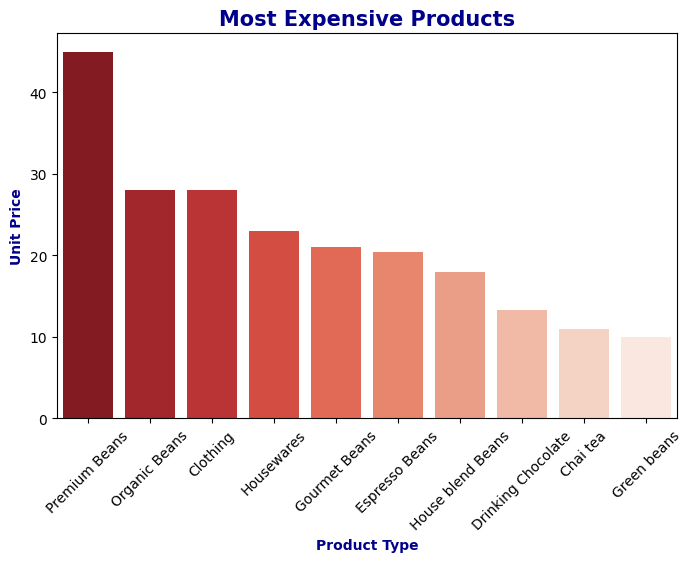

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_expensive_products, x='product_type', y='unit_price', palette='Reds_r')
plt.title("Most Expensive Products", fontdict=title_font)
plt.xlabel("Product Type",fontdict=axis_font)
plt.ylabel("Unit Price", fontdict=axis_font)
plt.xticks(rotation=45)
plt.show()

### 4.1.5 Total Sales Per Store <a id=4.1.5></a>

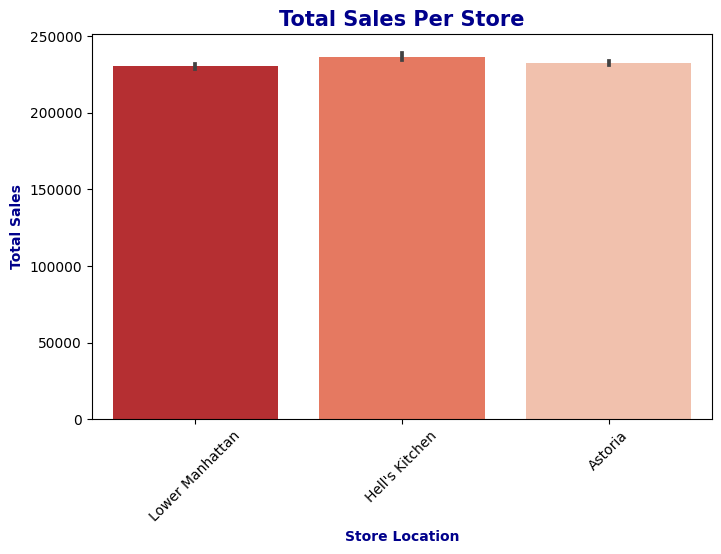

In [98]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='store_location', y='total_sales', estimator=sum, palette='Reds_r')
plt.title("Total Sales Per Store", fontdict=title_font)
plt.xlabel('Store Location', fontdict=axis_font)
plt.ylabel('Total Sales', fontdict=axis_font)
plt.xticks(rotation=45)
plt.show()

### 4.1.6 Total Sales Per Day <a id=4.1.6></a>

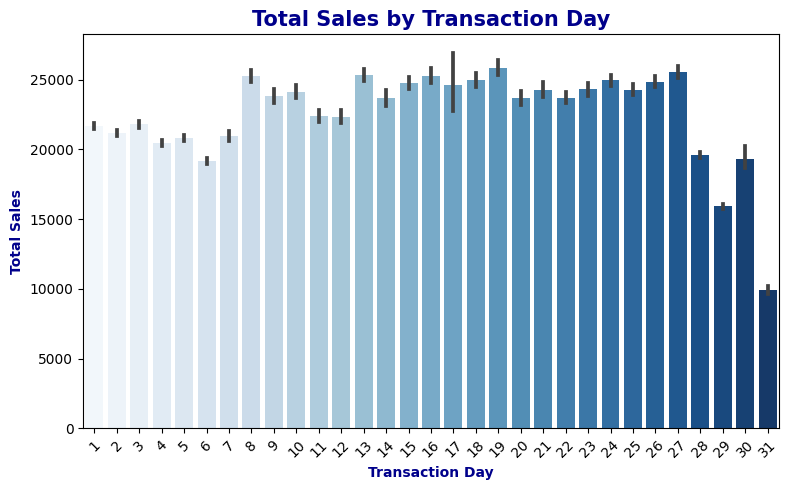

In [103]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='transaction_day', y='total_sales', estimator=sum, palette='Blues')
plt.title('Total Sales by Transaction Day', fontdict=title_font)
plt.xlabel('Transaction Day', fontdict=axis_font)
plt.ylabel('Total Sales', fontdict=axis_font)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.1.7 Total Sales Per Category <a id=4.1.7></a>

In [97]:
sales_per_category = df.groupby('product_category')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
sales_per_category

,product_category,total_sales
0,Coffee,269952.45
1,Tea,196405.95
2,Bakery,82315.64
3,Drinking Chocolate,72416.00
4,Coffee beans,40085.25
5,Branded,13607.00
6,Loose Tea,11213.60
7,Flavours,8408.80
8,Packaged Chocolate,4407.64


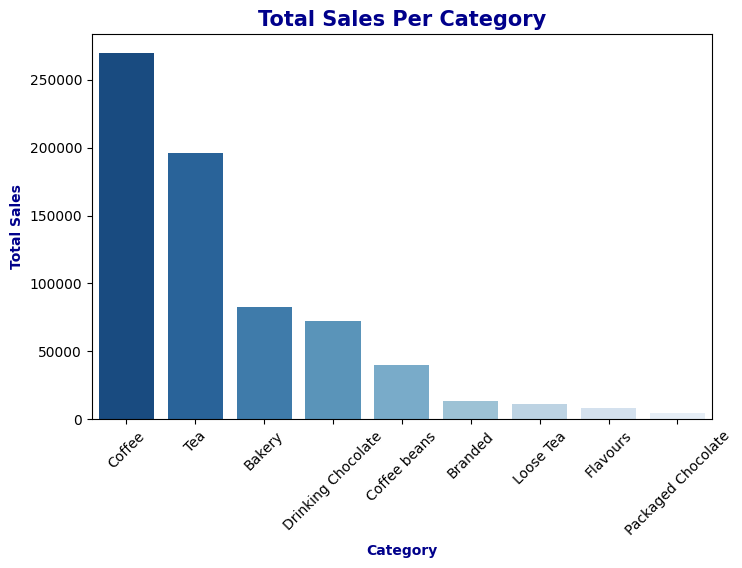

In [102]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_per_category, x='product_category', y='total_sales', palette='Blues_r')
plt.title("Total Sales Per Category", fontdict=title_font)
plt.xlabel("Category", fontdict=axis_font)
plt.ylabel("Total Sales", axis_font)
plt.xticks(rotation=45)
plt.show()

### 4.1.8 Total Sales by store_location & product_category <a id=4.1.8></a>

In [104]:
sales_cate_loc = df.groupby(['store_location', 'product_category'])['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
sales_cate_loc

,store_location,product_category,total_sales
0,Hell's Kitchen,Coffee,91222.65
1,Astoria,Coffee,89744.30
2,Lower Manhattan,Coffee,88985.50
3,Astoria,Tea,67839.90
4,Hell's Kitchen,Tea,64701.30
5,Lower Manhattan,Tea,63864.75
6,Lower Manhattan,Bakery,28328.94
7,Hell's Kitchen,Bakery,27386.95
8,Astoria,Bakery,26599.75
9,Astoria,Drinking Chocolate,26335.25


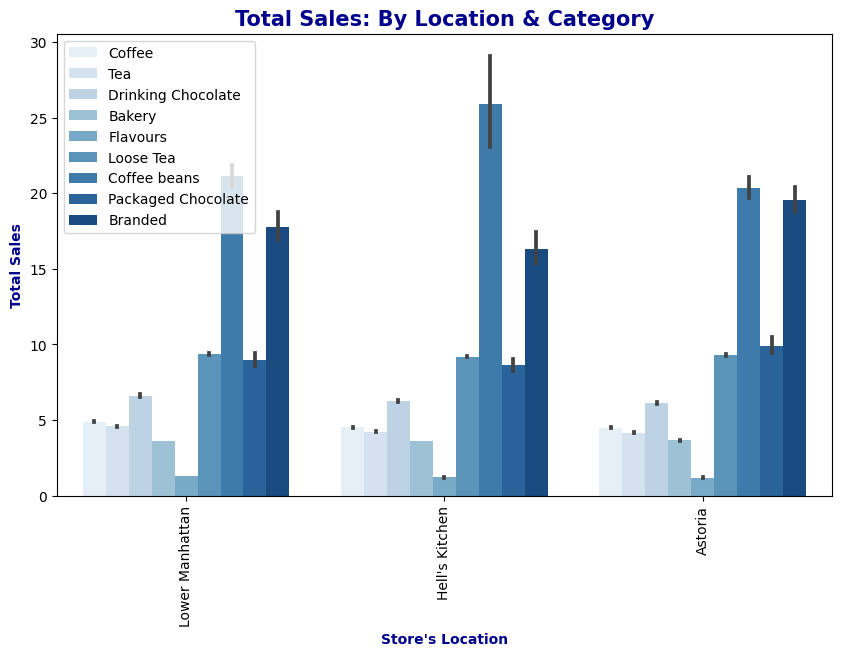

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='store_location', y='total_sales', hue='product_category', palette='Blues')
plt.title("Total Sales: By Location & Category", fontdict=title_font)
plt.xlabel("Store's Location", fontdict=axis_font)
plt.ylabel("Total Sales", fontdict=axis_font)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### 4.1.9 Total Sales Per store_location & month <a id=4.1.9></a>

In [106]:
sales_store_month = df.groupby(['store_location', 'transacation_month'])['total_sales'].agg('sum').reset_index().sort_values(by='store_location')
sales_store_month

,store_location,transacation_month,total_sales
0,Astoria,1,27313.66
1,Astoria,2,25105.34
2,Astoria,3,32835.43
3,Astoria,4,39477.61
4,Astoria,5,52428.76
5,Astoria,6,55083.11
11,Hell's Kitchen,6,56957.08
10,Hell's Kitchen,5,52598.93
9,Hell's Kitchen,4,40304.14
8,Hell's Kitchen,3,33110.57


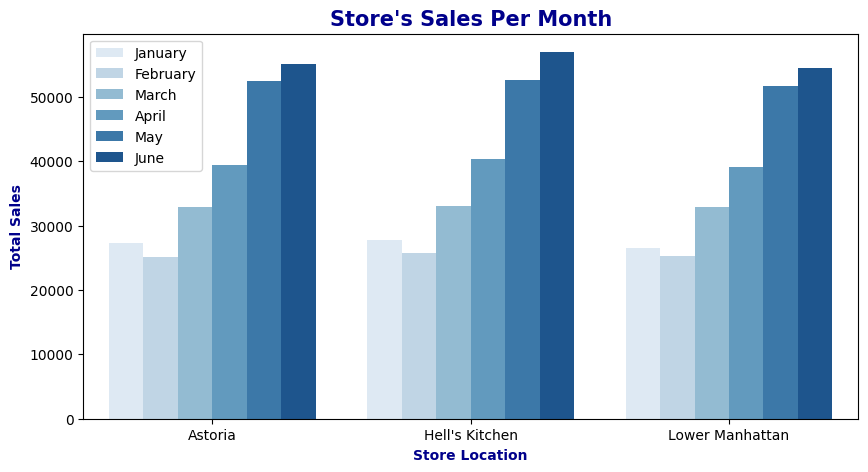

In [107]:
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_store_month, x='store_location', y='total_sales', hue=sales_store_month['transacation_month'].map(month_labels), palette="Blues")
plt.title("Store's Sales Per Month", fontdict=title_font)
plt.xlabel("Store Location", fontdict=axis_font)
plt.ylabel("Total Sales", fontdict=axis_font)
plt.legend(fontsize=10)
plt.show()

### 4.1.10 Most Ordered Category <a id=4.1.10></a>

In [109]:
orders_per_cate = df.groupby('product_category')['transaction_id'].nunique().sort_values(ascending=False)
orders_per_cate

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: transaction_id, dtype: int64

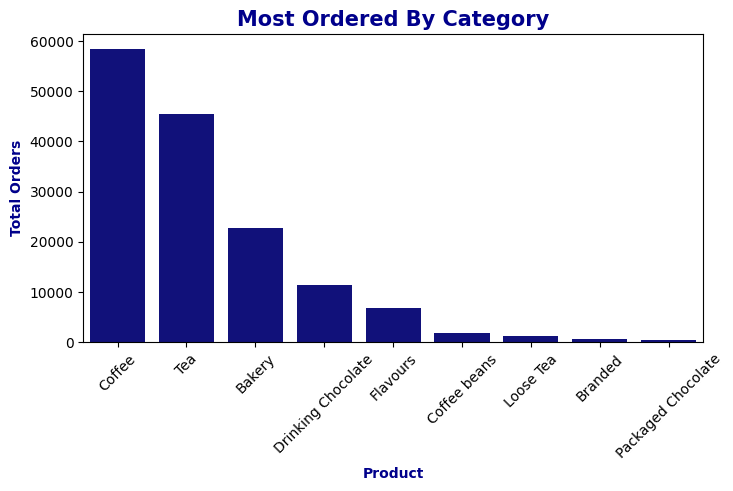

In [113]:
plt.figure(figsize=(8, 4))
sns.barplot(x=orders_per_cate.index, y=orders_per_cate, color='darkblue')
plt.title("Most Ordered By Category", fontdict=title_font)
plt.xlabel("Product", fontdict=axis_font)
plt.ylabel("Total Orders", fontdict=axis_font)
plt.xticks(rotation=45) 
plt.show()

## 4.2 Analyzing The DataFrame Using Barplot Using Pie Chart <a id=4.2></a>

### 4.2.1 Pie Chart Of Transaction's Count Per Store <a id=4.2.1></a>

In [60]:
store_location_counts = df['store_location'].value_counts()
store_location_counts

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

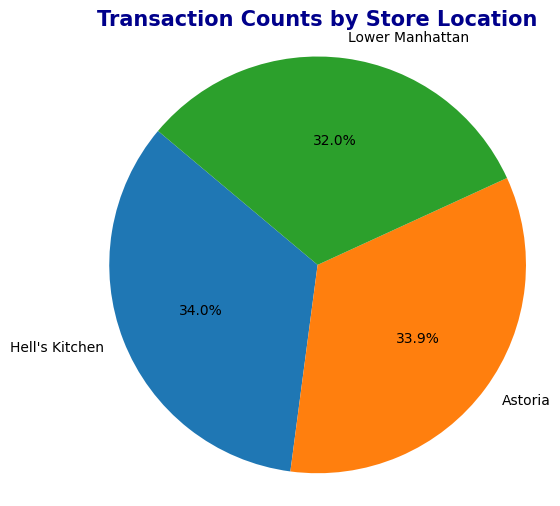

In [64]:
plt.figure(figsize=(6, 6))
plt.pie(store_location_counts, labels=store_location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transaction Counts by Store Location', fontdict=title_font)
plt.axis('equal')
plt.show()

### 4.2.2 Distribution of Sales by Product Category <a id=4.2.2></a>

In [65]:
product_category_counts = df['product_category'].value_counts()
product_category_counts

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

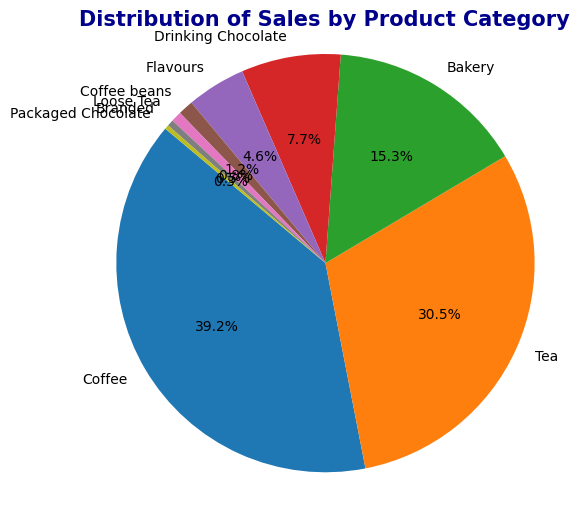

In [67]:
plt.figure(figsize=(6, 6))
plt.pie(product_category_counts, labels=product_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Product Category', fontdict=title_font)
plt.axis('equal')  
plt.show()

### 4.2.3 Distribution of Sales by Transaction Month <a id=4.2.3></a>

In [ ]:
transaction_month_counts = df['transacation_month'].value_counts()
transaction_month_counts

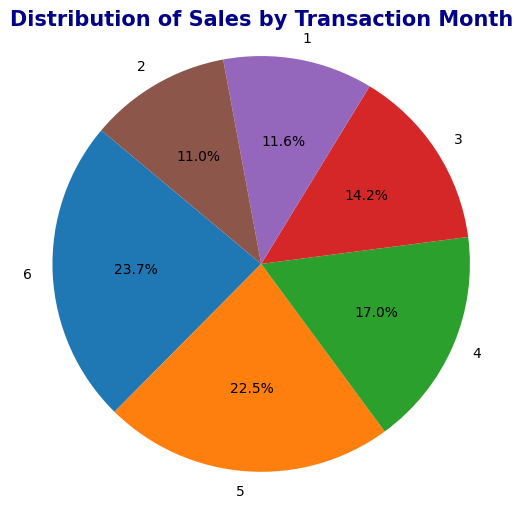

In [72]:
plt.figure(figsize=(6, 6))
plt.pie(transaction_month_counts, labels=transaction_month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Transaction Month', fontdict=title_font)
plt.axis('equal')
plt.show()

### 4.2.4 Pie Chart of Top Selling Products <a id=4.2.4></a>


In [89]:
top_selling_products = df['product_type'].value_counts().head(5)

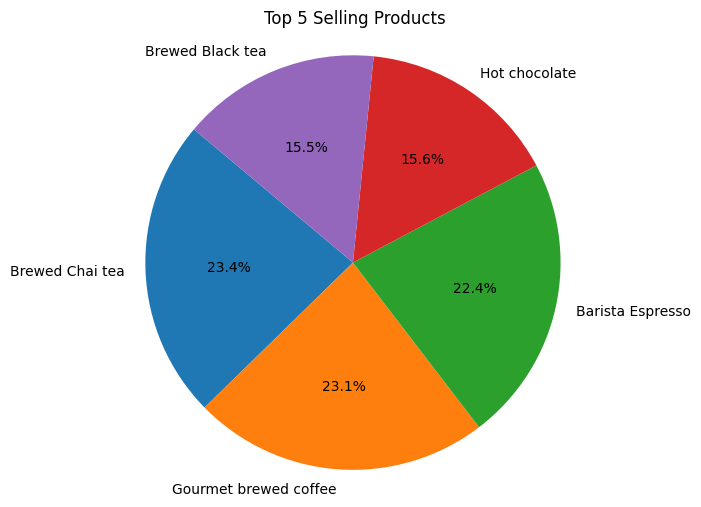

In [90]:
plt.figure(figsize=(6, 6))
plt.pie(top_selling_products, labels=top_selling_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Selling Products')
plt.axis('equal')
plt.show()

## 4.3 Sales Per Month Based on Total Revenue <a id=4.3></a>

<function matplotlib.pyplot.show(close=None, block=None)>

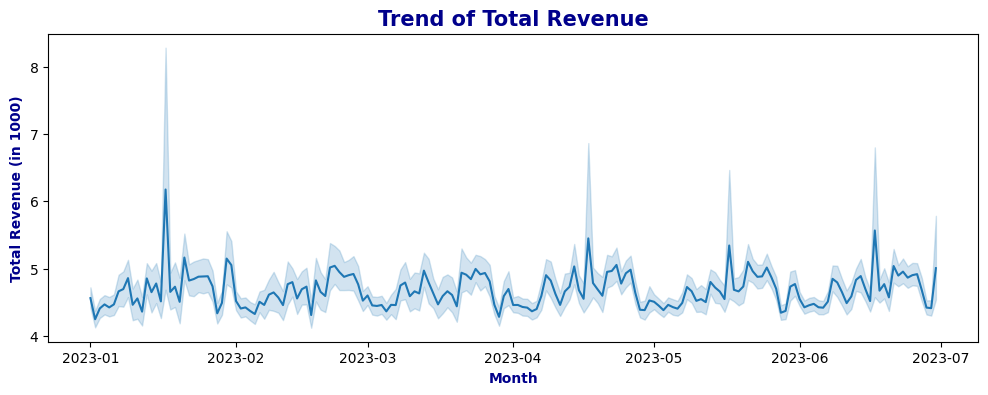

In [114]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=df['transaction_date'], y=df['total_sales'], data=df)
plt.title("Trend of Total Revenue", fontdict=title_font)
plt.xlabel("Month", fontdict=axis_font)
plt.ylabel("Total Revenue (in 1000)", fontdict=axis_font)
plt.show

## 4.4 Generate WordCloud From product_details <a id=4.4></a>

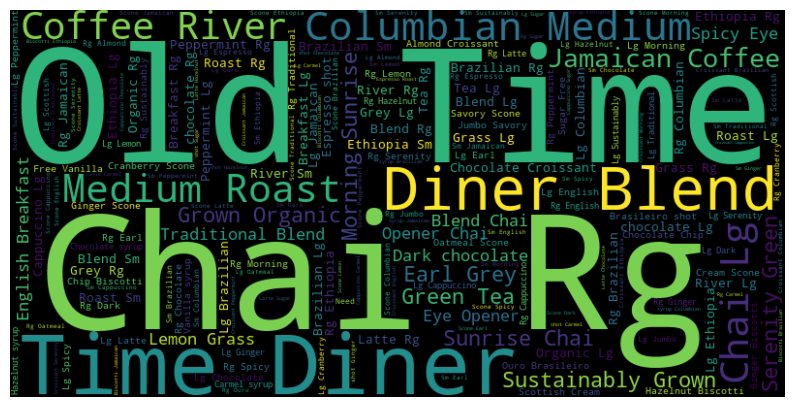

In [121]:
from wordcloud import WordCloud
text = ' '.join(df['product_detail'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400 ,background_color='black').generate(text)

# Plot the word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

## 4.5 unit_price Distribution <a id=4.5></a>

In [136]:
def distribution(col, bins=50):
    mean = df[col].mean()
    median = df[col].median()
    # Add mean and median to plot
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=bins, color='darkblue', rwidth=0.8, edgecolor='black', density=True)
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
    
    plt.title(f"Distribuition of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


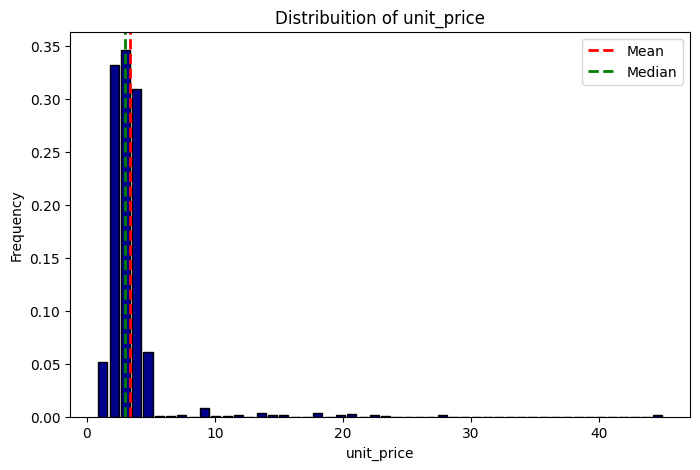

In [132]:
distribution('unit_price')

### 4.5.1 Analysis Output <a id=4.5.1></a>

In [138]:
skewness = df['unit_price'].skew()
mean = df['unit_price'].mean()
median = df['unit_price'].median()
print("Skewness: ", skewness)
print("Mean: ", mean)
print("Median: ", median)

Skewness:  8.45508762923046
Mean:  3.382219413074385
Median:  3.0



1. **Mean**: The mean unit price is approximately $3.38. This value represents the average price of a single unit of the product across all transactions in the dataset. It serves as a measure of central tendency, indicating the typical price point at which the product is sold.

2. **Median**: The median unit price is $3.00. Unlike the mean, which is sensitive to extreme values or outliers, the median represents the middle value of the unit prices when they are arranged in ascending order. In this case, the median suggests that half of the unit prices fall below $3.00 and half fall above it.

3. **Skewness**: The skewness of approximately 8.46 indicates a significant positive skew in the distribution of unit prices. A positive skew means that the tail of the distribution extends towards higher values, indicating that there are relatively more high-priced products compared to low-priced ones. In this context, the skewness value suggests that there might be a few products with substantially higher prices, causing the distribution to be skewed towards the right.

**Analysis**:

- The mean and median unit prices are relatively close, indicating that the distribution of unit prices is likely to be somewhat symmetric or only mildly skewed.
- However, the high positive skewness value suggests that there are outliers or a small number of products with exceptionally high prices, which significantly affect the distribution's shape.
- Understanding the factors contributing to the skewness, such as premium or luxury products, limited edition items, or pricing strategies, can provide valuable insights into the product portfolio and consumer preferences.
- Further analysis, such as identifying and examining the products contributing to the skewness, outlier detection, or exploring pricing strategies across different product categories, can help in understanding and managing pricing dynamicsin the dataset.

# 4.6 total_sales Distribution <a id=4.6></a>

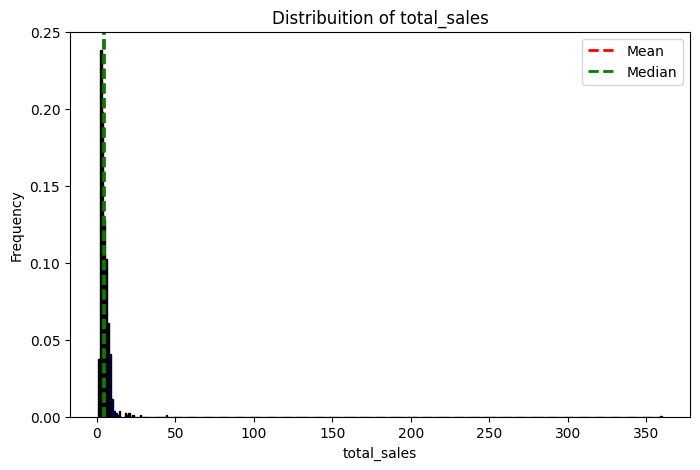

In [146]:
distribution("total_sales", bins=300)

### 4.6.1 Analysis Output <a id=4.6.1></a>

In [140]:
skewness = df['total_sales'].skew()
mean = df['total_sales'].mean()
median = df['total_sales'].median()
print("Skewness: ", skewness)
print("Mean: ", mean)
print("Median: ", median)

Skewness:  41.74589939197432
Mean:  4.686367190643527
Median:  3.75



1. **Mean**: The mean total sales amount is approximately $4.69. This value represents the average sales amount across all transactions in the dataset. It serves as a measure of central tendency, indicating the typical amount of sales generated per transaction.

2. **Media **: The median total sales amountis $3.75. Unlike the mean, which can be influenced by extreme values or outliers, the median represents the middle value of the sales amounts when arranged in ascending order. In this case, the median suggests that half of the total sales amounts fall below $3.75 and half fall above i4.

3. **Skewness**: The skewness of approximately 41.75 indicates a significant positive skew in the distribution of total sales amounts. A positive skew means that the tail of the distribution extends towards higher values, indicating that there are relatively more high sales amounts compared to low ones. In this context, the skewness value suggests that there might be a few transactions with exceptionally high sales amounts, causing the distribution to be heavily skewed towards the right.

**Analysis**:

- The mean total sales amount is higher than the median, indicating that the distribution is positively skewed.
- The large skewness value of 41.75 suggests a highly skewed distribution, indicating the presence of outliers or a small number of transactions with exceptionally high sales amounts.
- Understanding the factors contributing to the skewness, such as large bulk purchases, high-value transactions, or outlier transactions, can provide insights into the sales dynamics and customer behavior.
- Further analysis, such as identifying and examining the transactions contributing to the skewness, outlier detection, or exploring sales patterns across different time periods or store locations, can help in understanding and managing sales variabilityin the dataset.in the dataset.

## 4.7 Box Plot for unit_price & total_sales <a id=4.7></a>

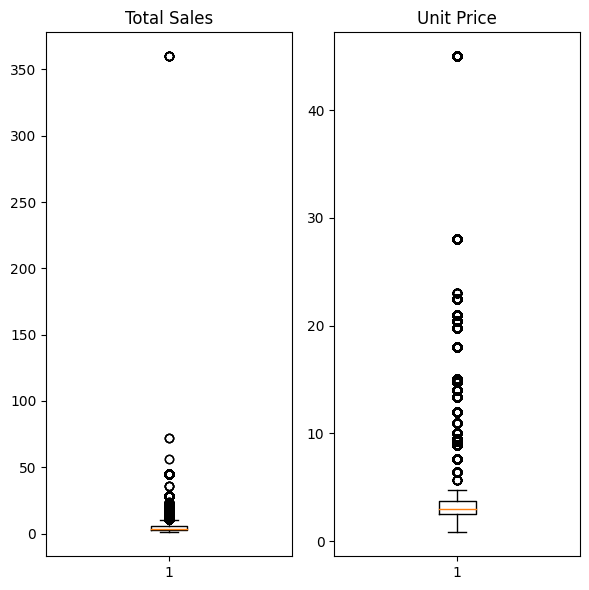

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 6))

ax1.boxplot(df["total_sales"])
ax1.set_title("Total Sales")

ax2.boxplot(df["unit_price"])
ax2.set_title("Unit Price")

plt.tight_layout()
plt.show()

### 4.7.1 Analysis Output <a id=4.7.1></a>
* **Outliers**:
    * According to above plots it is clear that there are lots of ouliers in both `unit_price`, `total_sales`.

## 4.8 Unit Price vs. Total Sales <a id=4.8></a>

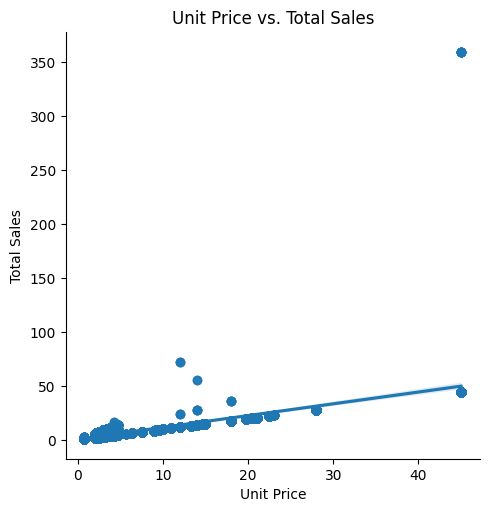

In [154]:
sns.lmplot(x='unit_price', y='total_sales', data=df)
plt.title('Unit Price vs. Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.show()

### 4.8.1 Analysis Output <a id=4.8.1></a>

* **Unit Price Vs Total Price**:
    * As we may already know , there is highly positive correlation between variables.

## 4.9 Correlation <a id=4.9></a>

<AxesSubplot:>

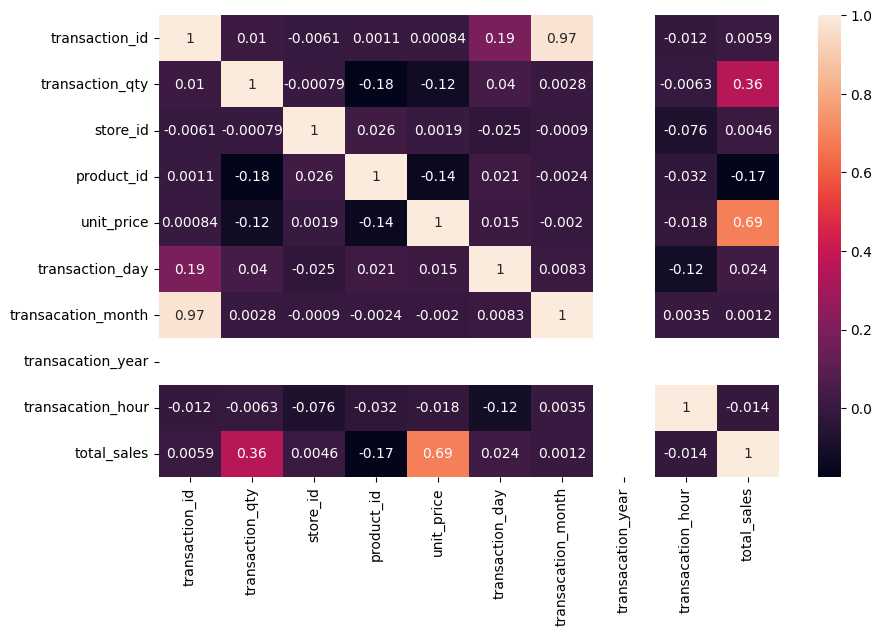

In [158]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 5. Simple ML Modelling Using Linear Regression <a id=5></a>

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [161]:
X = df[['unit_price', 'transaction_qty']]
y = df['total_sales']

# train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating LR model instance
model = LinearRegression()

# Train The Model
model.fit(X_train, y_train)

# Prediction on test Data
y_pred = model.predict(X_test)


# Check The Accuracy of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.5843620845209088
R2:  0.936084204510349
